# Notebook for assessment data

In [61]:
import torch 
import torchvision
from torchvision import io
import matplotlib.pyplot as plt 
import cv2
from skimage.metrics import structural_similarity
import numpy as np 
from PIL.Image import Image
from src.loss import Adv_loss,Enc_loss,Cnt_loss
import os
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [66]:
g_e = torch.load("/home/yuning/DL/Monument/models/pt2_g_e_1200.pt");g_e.eval()
g_d = torch.load("/home/yuning/DL/Monument/models/pt2_g_d_1200.pt");g_d.eval()
dis = torch.load("/home/yuning/DL/Monument/models/pt2_dis_1200.pt");dis.eval()

dis(
  (dis_conv): Sequential(
    (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2))
    (BN1): BatchNorm2d([32], eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
    (Leaky1): LeakyReLU(negative_slope=0.01)
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (BN2): BatchNorm2d([64], eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
    (Leaky2): LeakyReLU(negative_slope=0.01)
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (conv4): Conv2d(128, 1, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
  )
  (dis_out): Sequential(
    (GlobAvgPool): AdaptiveAvgPool2d(output_size=1)
    (Sigmoid): Sigmoid()
  )
)

In [67]:
# abnormal_imag_path = "/home/yuning/DL/Monument/Test_IMG/Test_72/abnormal/"
normal_imag_path = "/home/yuning/DL/Monument/pt2_data/pt2_test_img/Test_72/normal/"
# abnormal_imag_path_list = [os.path.join(abnormal_imag_path,i) for i in os.listdir(abnormal_imag_path)]
normal_imag_path_list = [os.path.join(normal_imag_path,i) for i in os.listdir(normal_imag_path)]

In [69]:
from src.utils import Encode_And_Mask
save_dir = "/home/yuning/DL/Monument/pt2_data/pt2_n_out"
if os.path.exists(save_dir)is False:
    os.mkdir(save_dir)

Encode_And_Mask(normal_imag_path,save_dir,
                g_e,g_d,device)

# image_id = 0
# abnormal_image_name_list = os.listdir(abnormal_imag_path)

# save_dir = "/home/yuning/DL/Monument/"
# # save_dir = "/home/yuning/DL/Monument/abn_out_pt2"


# abnormal_imag_snap = io.image.read_image(abnormal_imag_path_list[image_id])/255.0
# abnormal_imag_snap_gpu= abnormal_imag_snap.unsqueeze(0).float().to(device)
# with torch.no_grad():
#     abnormal_imag_snap_encoded_gpu =g_d(g_e(abnormal_imag_snap_gpu))

# abnormal_imag_snap_encoded_uint8 = torch.tensor(255.0*abnormal_imag_snap_gpu.clone().detach().cpu().squeeze(),dtype=torch.uint8)

# abnormal_image_snap_mask = torch.abs(255.0*abnormal_imag_snap_encoded_gpu.clone().detach().cpu() - 255.0*abnormal_imag_snap_gpu.clone().detach().cpu())
# abnormal_imag_snap_mask_uint8 = torch.tensor(abnormal_image_snap_mask.clone().detach().cpu().squeeze(),dtype=torch.uint8)


# io.write_jpeg(abnormal_imag_snap_mask_uint8,
#              os.path.join(save_dir,"mask_{}".format(abnormal_image_name_list[image_id])),
#                                                                                 quality=100)
# io.write_jpeg(abnormal_imag_snap_encoded_uint8,
#               os.path.join(save_dir,"encoded_{}".format(abnormal_image_name_list[image_id]))
#                                                                                 ,quality=100)



  0%|          | 0/9 [00:00<?, ?it/s]/home/yuning/DL/Monument/src/utils.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  abnormal_imag_snap_encoded_uint8 = torch.tensor(255.0*abnormal_imag_snap_encoded_gpu.clone().detach().cpu().squeeze(),dtype=torch.uint8)
/home/yuning/DL/Monument/src/utils.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  abnormal_imag_snap_mask_uint8 = torch.tensor(abnormal_image_snap_mask_grey,dtype=torch.uint8)
100%|██████████| 9/9 [00:00<00:00, 30.93it/s]

All images have been encoded


## SSIM

In [ ]:
# import cv2
# SSMI_Score = {}

# # for image_id in range(len(abnormal_imag_path_list)):
# for image_id in range(5):
#     print(abnormal_imag_path_list[image_id])
#     image_No = abnormal_imag_path_list[image_id].find("Aug")

#     abnormal_img_id = abnormal_imag_path_list[image_id][image_No+4:image_No+7]
#     abnormal_img_file_name = abnormal_imag_path_list[image_id][image_No+4:]
#     # print(normal_img_id)
#     print(abnormal_img_file_name)

#     encoded_abnormal_image_path = "/home/yuning/DL/Monument/abn_out_pt2"
#     encoded_abnormal_image_path_list = [ os.path.join(encoded_abnormal_image_path,i) for i in os.listdir(encoded_abnormal_image_path) ]

#     for encoded_abn_image_dir in encoded_abnormal_image_path_list:
#         if abnormal_img_file_name in encoded_abn_image_dir:
#             encoded_abn_image_to_read = encoded_abn_image_dir

#     print(encoded_abn_image_to_read)



#     abnormal_image_snap_cv2 = cv2.imread(abnormal_imag_path_list[image_id])
#     normal_image_snap_cv2 = cv2.imread(encoded_abn_image_to_read)

#     abnormal_image_snap_grey =cv2.cvtColor(abnormal_image_snap_cv2,cv2.COLOR_BGR2GRAY)
#     normal_image_snap_grey =cv2.cvtColor(normal_image_snap_cv2,cv2.COLOR_BGR2GRAY)

#     (score,diff) = structural_similarity(abnormal_image_snap_grey,normal_image_snap_grey,win_size=3,full=True)
#     SSMI_Score[abnormal_img_file_name] = score
#     print(score)
#     diff_to_show = (diff *255).astype("uint8")
#     # cv2.namedWindow("diff",cv2.WINDOW_NORMAL)
#     plt.figure(image_id)
#     plt.imshow(diff_to_show,cmap="Blues")


## Discrimator

In [ ]:
# image_id = 7
# abnormal_imag_snap = io.image.read_image(abnormal_imag_path_list[image_id])/255.0
# normal_imag_snap = io.image.read_image(normal_imag_path_list[image_id])/255.0

# abnormal_imag_snap_gpu= abnormal_imag_snap.unsqueeze(0).float().to(device)
# normal_imag_snap_gpu= normal_imag_snap.unsqueeze(0).float().to(device)
# with torch.no_grad():
    
#     abnormal_imag_score=Adv_loss(g_feature= g_e(abnormal_imag_snap_gpu),d_feature= dis(abnormal_imag_snap_gpu))
#     normal_imag_score=Adv_loss(g_feature= g_e(normal_imag_snap_gpu),d_feature= dis(normal_imag_snap_gpu))
    

# print("Score for {} is {}".format(abnormal_imag_path_list[image_id],abnormal_imag_score.item()))
# print("Score for {} is {}".format(normal_imag_path_list[image_id],normal_imag_score.item()))

Score for /home/yuning/DL/Monument/Test_IMG/Test_72/abnormal/Aug 001-caving.jpg is 0.8030376434326172
Score for /home/yuning/DL/Monument/Test_IMG/Test_72/normal/Aug 140-normal.jpg is 1.2358334064483643


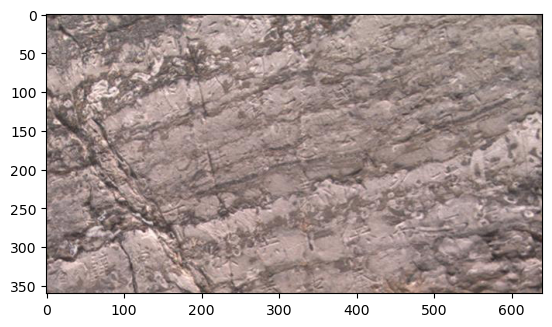

In [ ]:
# plt.imshow(abnormal_imag_snap.permute(1,2,0))